# Desafio Codenation - Obter a nota de matemática de um aluno no enem 2016

## Adicionando bibliotecas e dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#path necessário para passar o endereço do arquivo
path = '/content/drive/My Drive/LINGUAGENS/PYTHON/0.1 - PROJETOS/DESAFIO CODENATION/'

In [0]:
df = pd.read_csv(path + 'train.csv')
df2 = pd.read_csv(path + 'test.csv')

## Análise Exploratória

In [5]:
#Verificando os dados do df
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [6]:
len(df2.columns)

47

### Ajustar features do df com o df2

In [0]:
#Observado que o dataframe de treino está com mais features do que o de teste
colunas = df.columns
for i in colunas:
    if i == 'NU_NOTA_MT':
      pass
    elif i in df2.columns:
      pass
    else:
      df.drop(labels= i, axis= 1, inplace= True)

In [8]:
#Verificando quantidades de colunas
len(df.columns)

48

### Visualizar Missing Values

Text(0.5, 1.0, 'Missing Value Train')

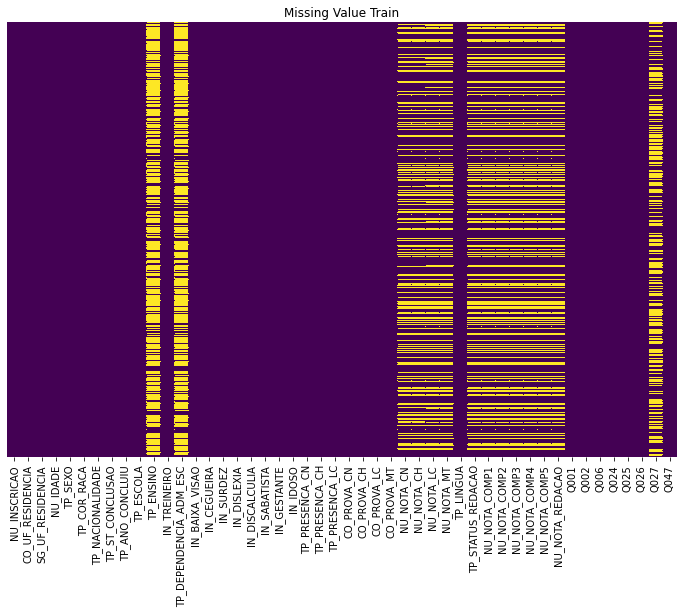

In [9]:
#Visualizando os valores missing
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Train')

Text(0.5, 1.0, 'Missing Value Test')

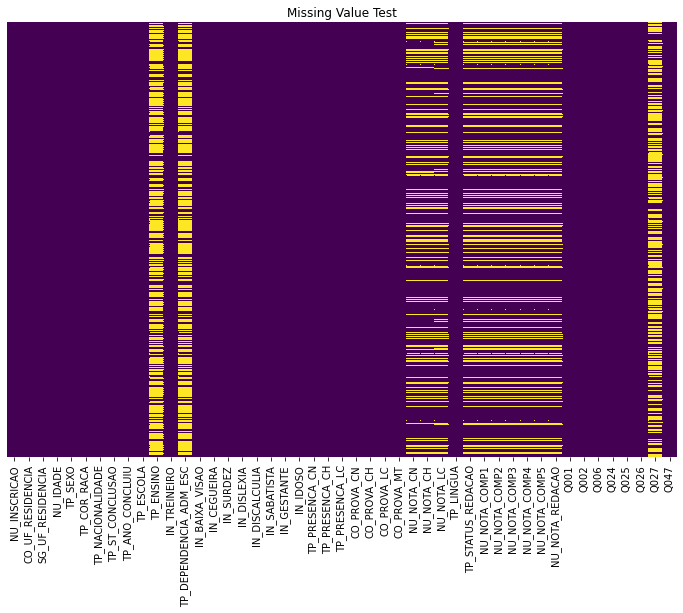

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Test')

### Aplicando nota 0 as alunos que não compareceram ou foram expulsos da prova tanto

In [0]:
#No dicionário consta que 0(faltou) e 2(expulso) partindo desse princípio, se o aluno não veio o objetivo é zerar as notas
df.loc[df['TP_PRESENCA_CN'] == 0, ['NU_NOTA_MT', 'NU_NOTA_CN']] = 0
df.loc[df['TP_PRESENCA_CN'] == 2, ['NU_NOTA_MT', 'NU_NOTA_CN']] = 0
df.loc[df['TP_PRESENCA_CH'] == 0, ['NU_NOTA_LC', 'NU_NOTA_CH']] = 0
df.loc[df['TP_PRESENCA_CH'] == 2, ['NU_NOTA_LC', 'NU_NOTA_CH']] = 0

In [0]:
df2.loc[df2['TP_PRESENCA_CN'] == 0, 'NU_NOTA_CN'] = 0
df2.loc[df2['TP_PRESENCA_CN'] == 2, 'NU_NOTA_CN'] = 0
df2.loc[df2['TP_PRESENCA_CH'] == 0, ['NU_NOTA_LC', 'NU_NOTA_CH']] = 0
df2.loc[df2['TP_PRESENCA_CH'] == 2, ['NU_NOTA_LC', 'NU_NOTA_CH']] = 0

In [0]:
df.loc[df['TP_PRESENCA_LC'] == 0, ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']] = 0
df.loc[df['TP_PRESENCA_LC'] == 2, ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']] = 0

In [0]:
df2.loc[df2['TP_PRESENCA_LC'] == 0, ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']] = 0
df2.loc[df2['TP_PRESENCA_LC'] == 2, ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']] = 0

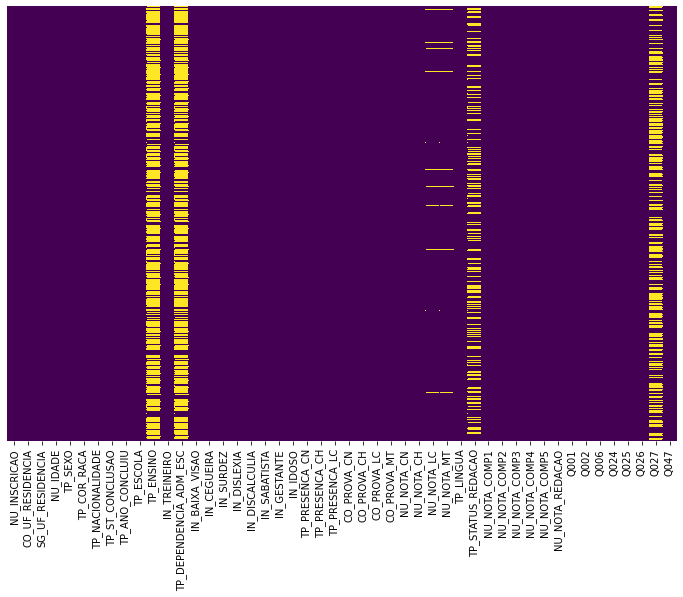

In [15]:
#Observamos aqui que um quantidade houve uma pequena diferença no ajuste dos valores faltantes no df de teste
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Verificando e tratamento dos missing values

In [16]:
for i in zip(df.columns, list(df.isnull().sum())):
    print(i)

('NU_INSCRICAO', 0)
('CO_UF_RESIDENCIA', 0)
('SG_UF_RESIDENCIA', 0)
('NU_IDADE', 0)
('TP_SEXO', 0)
('TP_COR_RACA', 0)
('TP_NACIONALIDADE', 0)
('TP_ST_CONCLUSAO', 0)
('TP_ANO_CONCLUIU', 0)
('TP_ESCOLA', 0)
('TP_ENSINO', 9448)
('IN_TREINEIRO', 0)
('TP_DEPENDENCIA_ADM_ESC', 9448)
('IN_BAIXA_VISAO', 0)
('IN_CEGUEIRA', 0)
('IN_SURDEZ', 0)
('IN_DISLEXIA', 0)
('IN_DISCALCULIA', 0)
('IN_SABATISTA', 0)
('IN_GESTANTE', 0)
('IN_IDOSO', 0)
('TP_PRESENCA_CN', 0)
('TP_PRESENCA_CH', 0)
('TP_PRESENCA_LC', 0)
('CO_PROVA_CN', 0)
('CO_PROVA_CH', 0)
('CO_PROVA_LC', 0)
('CO_PROVA_MT', 0)
('NU_NOTA_CN', 0)
('NU_NOTA_CH', 0)
('NU_NOTA_LC', 244)
('NU_NOTA_MT', 244)
('TP_LINGUA', 0)
('TP_STATUS_REDACAO', 3597)
('NU_NOTA_COMP1', 0)
('NU_NOTA_COMP2', 0)
('NU_NOTA_COMP3', 0)
('NU_NOTA_COMP4', 0)
('NU_NOTA_COMP5', 0)
('NU_NOTA_REDACAO', 0)
('Q001', 0)
('Q002', 0)
('Q006', 0)
('Q024', 0)
('Q025', 0)
('Q026', 0)
('Q027', 7373)
('Q047', 0)


In [0]:
#Analisando os dados é observado que algumas colunas o preenchimento por alguma mediana é inviável
col = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027', 'TP_STATUS_REDACAO']
row = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']

In [0]:
#Removendo colunas
df.drop(labels= col,axis= 1, inplace= True)
df2.drop(labels= col, axis= 1, inplace= True)

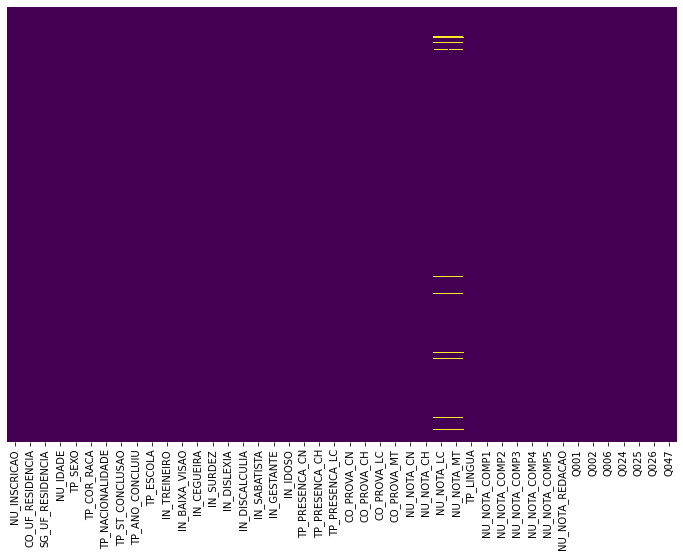

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

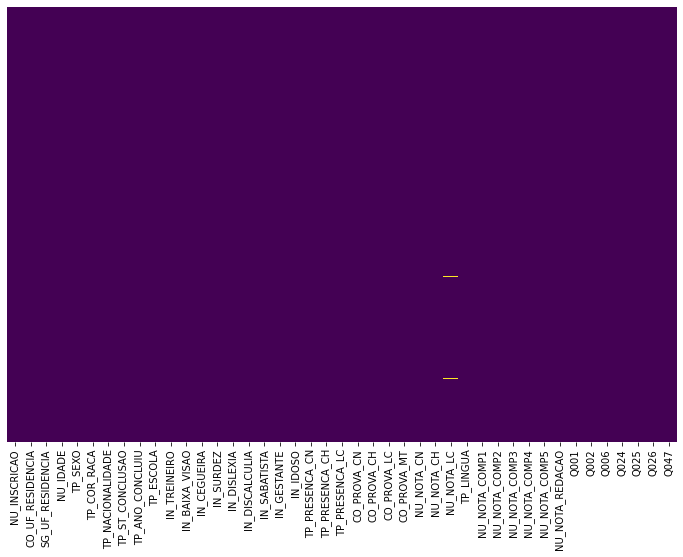

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
# verificando onde consta os valores nulos
for i in zip(df.columns, list(df.isnull().sum())):
    print(i)

('NU_INSCRICAO', 0)
('CO_UF_RESIDENCIA', 0)
('SG_UF_RESIDENCIA', 0)
('NU_IDADE', 0)
('TP_SEXO', 0)
('TP_COR_RACA', 0)
('TP_NACIONALIDADE', 0)
('TP_ST_CONCLUSAO', 0)
('TP_ANO_CONCLUIU', 0)
('TP_ESCOLA', 0)
('IN_TREINEIRO', 0)
('IN_BAIXA_VISAO', 0)
('IN_CEGUEIRA', 0)
('IN_SURDEZ', 0)
('IN_DISLEXIA', 0)
('IN_DISCALCULIA', 0)
('IN_SABATISTA', 0)
('IN_GESTANTE', 0)
('IN_IDOSO', 0)
('TP_PRESENCA_CN', 0)
('TP_PRESENCA_CH', 0)
('TP_PRESENCA_LC', 0)
('CO_PROVA_CN', 0)
('CO_PROVA_CH', 0)
('CO_PROVA_LC', 0)
('CO_PROVA_MT', 0)
('NU_NOTA_CN', 0)
('NU_NOTA_CH', 0)
('NU_NOTA_LC', 244)
('NU_NOTA_MT', 244)
('TP_LINGUA', 0)
('NU_NOTA_COMP1', 0)
('NU_NOTA_COMP2', 0)
('NU_NOTA_COMP3', 0)
('NU_NOTA_COMP4', 0)
('NU_NOTA_COMP5', 0)
('NU_NOTA_REDACAO', 0)
('Q001', 0)
('Q002', 0)
('Q006', 0)
('Q024', 0)
('Q025', 0)
('Q026', 0)
('Q047', 0)


In [0]:
# Removendo as 244 linhas de valores faltantes
df.dropna(inplace= True)

#### Tratando o df2

In [0]:
#pelo fato de os dados de testes não poderem ser removidos as linhas, preenchendo dados de interesse com a média
df2['NU_NOTA_CN'].fillna(df2['NU_NOTA_CN'].mean(), inplace= True)
df2['NU_NOTA_LC'].fillna(df2['NU_NOTA_LC'].mean(), inplace= True)

In [24]:
df2.isnull().sum()

NU_INSCRICAO        0
CO_UF_RESIDENCIA    0
SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
TP_COR_RACA         0
TP_NACIONALIDADE    0
TP_ST_CONCLUSAO     0
TP_ANO_CONCLUIU     0
TP_ESCOLA           0
IN_TREINEIRO        0
IN_BAIXA_VISAO      0
IN_CEGUEIRA         0
IN_SURDEZ           0
IN_DISLEXIA         0
IN_DISCALCULIA      0
IN_SABATISTA        0
IN_GESTANTE         0
IN_IDOSO            0
TP_PRESENCA_CN      0
TP_PRESENCA_CH      0
TP_PRESENCA_LC      0
CO_PROVA_CN         0
CO_PROVA_CH         0
CO_PROVA_LC         0
CO_PROVA_MT         0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
TP_LINGUA           0
NU_NOTA_COMP1       0
NU_NOTA_COMP2       0
NU_NOTA_COMP3       0
NU_NOTA_COMP4       0
NU_NOTA_COMP5       0
NU_NOTA_REDACAO     0
Q001                0
Q002                0
Q006                0
Q024                0
Q025                0
Q026                0
Q047                0
dtype: int64

### Tratamento dos types

In [25]:
#verifindo os types das features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13486 entries, 0 to 13729
Data columns (total 44 columns):
NU_INSCRICAO        13486 non-null object
CO_UF_RESIDENCIA    13486 non-null int64
SG_UF_RESIDENCIA    13486 non-null object
NU_IDADE            13486 non-null int64
TP_SEXO             13486 non-null object
TP_COR_RACA         13486 non-null int64
TP_NACIONALIDADE    13486 non-null int64
TP_ST_CONCLUSAO     13486 non-null int64
TP_ANO_CONCLUIU     13486 non-null int64
TP_ESCOLA           13486 non-null int64
IN_TREINEIRO        13486 non-null int64
IN_BAIXA_VISAO      13486 non-null int64
IN_CEGUEIRA         13486 non-null int64
IN_SURDEZ           13486 non-null int64
IN_DISLEXIA         13486 non-null int64
IN_DISCALCULIA      13486 non-null int64
IN_SABATISTA        13486 non-null int64
IN_GESTANTE         13486 non-null int64
IN_IDOSO            13486 non-null int64
TP_PRESENCA_CN      13486 non-null int64
TP_PRESENCA_CH      13486 non-null int64
TP_PRESENCA_LC      13486 n

### Tratar features categóricas e aplicando LabelEnconder e Replace

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
#Instanciando o LabelEnconder
lb_object = LabelEncoder()

In [0]:
#Aplicando o Label enconder nas respectivas colunas
df['SG_UF_RESIDENCIA'] = lb_object.fit_transform(df['SG_UF_RESIDENCIA'])
df2['SG_UF_RESIDENCIA'] = lb_object.transform(df2['SG_UF_RESIDENCIA'])

df['TP_SEXO'] = lb_object.fit_transform(df['TP_SEXO'])
df2['TP_SEXO'] = lb_object.transform(df2['TP_SEXO'])

df['CO_PROVA_CN'] = lb_object.fit_transform(df['CO_PROVA_CN'])
df2['CO_PROVA_CN'] = lb_object.transform(df2['CO_PROVA_CN'])

df['CO_PROVA_CN'] = lb_object.fit_transform(df['CO_PROVA_CN'])
df2['CO_PROVA_CN'] = lb_object.transform(df2['CO_PROVA_CN'])

df['CO_PROVA_CH'] = lb_object.fit_transform(df['CO_PROVA_CH'])
df2['CO_PROVA_CH'] = lb_object.transform(df2['CO_PROVA_CH'])

df['CO_PROVA_LC'] = lb_object.fit_transform(df['CO_PROVA_LC'])
df2['CO_PROVA_LC'] = lb_object.transform(df2['CO_PROVA_LC'])

df['CO_PROVA_MT'] = lb_object.fit_transform(df['CO_PROVA_MT'])
df2['CO_PROVA_MT'] = lb_object.transform(df2['CO_PROVA_MT'])



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13486 entries, 0 to 13729
Data columns (total 44 columns):
NU_INSCRICAO        13486 non-null object
CO_UF_RESIDENCIA    13486 non-null int64
SG_UF_RESIDENCIA    13486 non-null int64
NU_IDADE            13486 non-null int64
TP_SEXO             13486 non-null int64
TP_COR_RACA         13486 non-null int64
TP_NACIONALIDADE    13486 non-null int64
TP_ST_CONCLUSAO     13486 non-null int64
TP_ANO_CONCLUIU     13486 non-null int64
TP_ESCOLA           13486 non-null int64
IN_TREINEIRO        13486 non-null int64
IN_BAIXA_VISAO      13486 non-null int64
IN_CEGUEIRA         13486 non-null int64
IN_SURDEZ           13486 non-null int64
IN_DISLEXIA         13486 non-null int64
IN_DISCALCULIA      13486 non-null int64
IN_SABATISTA        13486 non-null int64
IN_GESTANTE         13486 non-null int64
IN_IDOSO            13486 non-null int64
TP_PRESENCA_CN      13486 non-null int64
TP_PRESENCA_CH      13486 non-null int64
TP_PRESENCA_LC      13486 non

In [0]:
#Aplicando replace
df['Q001'] = df['Q001'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8})
df2['Q001'] = df2['Q001'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8})

df['Q002'] = df['Q002'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8})
df2['Q002'] = df2['Q002'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8})

df['Q006'] = df['Q006'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11,'L':12, 'M':13, 'N':14, 'O':15, 'P':16, 'Q':17})
df2['Q006'] = df2['Q006'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11,'L':12, 'M':13, 'N':14, 'O':15, 'P':16, 'Q':17})

df['Q024'] = df['Q024'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5})
df2['Q024'] = df2['Q024'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5})

df['Q025'] = df['Q025'].replace({'A':1, 'B':2})
df2['Q025'] = df2['Q025'].replace({'A':1, 'B':2})

df['Q026'] = df['Q026'].replace({'A':1, 'B':2, 'C':3})
df2['Q026'] = df2['Q026'].replace({'A':1, 'B':2, 'C':3})

df['Q047'] = df['Q047'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5})
df2['Q047'] = df2['Q047'].replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5})

In [31]:
#df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 43 columns):
NU_INSCRICAO        4576 non-null object
CO_UF_RESIDENCIA    4576 non-null int64
SG_UF_RESIDENCIA    4576 non-null int64
NU_IDADE            4576 non-null int64
TP_SEXO             4576 non-null int64
TP_COR_RACA         4576 non-null int64
TP_NACIONALIDADE    4576 non-null int64
TP_ST_CONCLUSAO     4576 non-null int64
TP_ANO_CONCLUIU     4576 non-null int64
TP_ESCOLA           4576 non-null int64
IN_TREINEIRO        4576 non-null int64
IN_BAIXA_VISAO      4576 non-null int64
IN_CEGUEIRA         4576 non-null int64
IN_SURDEZ           4576 non-null int64
IN_DISLEXIA         4576 non-null int64
IN_DISCALCULIA      4576 non-null int64
IN_SABATISTA        4576 non-null int64
IN_GESTANTE         4576 non-null int64
IN_IDOSO            4576 non-null int64
TP_PRESENCA_CN      4576 non-null int64
TP_PRESENCA_CH      4576 non-null int64
TP_PRESENCA_LC      4576 non-null int64
CO_PROVA_CN 

## Machine Learning

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [0]:
data = df.drop(labels= ['NU_INSCRICAO', 'NU_NOTA_MT'], axis= 1)
target = df['NU_NOTA_MT']
test = df2.drop('NU_INSCRICAO', axis= 1)

### Random Forest Regressor

In [0]:
#Instânciado o método
rand = RandomForestRegressor()

In [35]:
#treinando os dados
rand.fit(data, target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
#Score do treino
rand.score(data, target)

0.9890621551140539

In [0]:
#Predizendo os dados de treino
data_pred = rand.predict(data)

In [38]:
#Analisando as métricas
print('MAE:', metrics.mean_absolute_error(target, data_pred))
print('MSE:', metrics.mean_squared_error(target, data_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(target, data_pred)))

MAE: 16.072783182559697
MSE: 560.762917637402
RMSE: 23.680433223178202


In [39]:
#Predizendo o test
result = rand.predict(test)
result

array([433.61 , 439.444, 595.684, ..., 677.244, 451.29 ,   0.   ])

In [0]:
#Criando um dataframe que vai ser exportado para csv
answer = pd.DataFrame(data= df2['NU_INSCRICAO'])
answer['NU_NOTA_MT'] = result

In [0]:
answer.to_csv(path + 'answer_rand.csv', index= False)

In [0]:
verificad = pd.read_csv(path + 'answer_rand.csv')

In [43]:
verificad

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,433.610
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,439.444
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.684
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,570.623
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,467.026
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,490.425
4573,655fa6306720ff16e825903b5422a46608a77545,677.244
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,451.290


Com esta abordagem obtive um score de 92,4%, sendo selecionado para a aceleração.

### Verificando as features relevantes

In [44]:
fi = rand.feature_importances_
l = len(data.columns)
aux = []
for i in range(0,len(data.columns)):
    print('{:.<20} {:3}'.format(data.columns[i], fi[i]))
    aux.append(data.columns[i])

CO_UF_RESIDENCIA.... 0.004132225779693654
SG_UF_RESIDENCIA.... 0.0038421241216721243
NU_IDADE............ 0.003653269723292388
TP_SEXO............. 0.002079010489685391
TP_COR_RACA......... 0.0017841975760701549
TP_NACIONALIDADE.... 0.0002683610110824119
TP_ST_CONCLUSAO..... 0.0008794743926540502
TP_ANO_CONCLUIU..... 0.0018410596588735802
TP_ESCOLA........... 0.0008711225350700953
IN_TREINEIRO........ 0.00029709328319530814
IN_BAIXA_VISAO...... 4.532561816491257e-06
IN_CEGUEIRA......... 0.0
IN_SURDEZ........... 3.951663405422264e-08
IN_DISLEXIA......... 7.200957860908505e-08
IN_DISCALCULIA...... 1.1572203140024562e-05
IN_SABATISTA........ 0.00014910307763263522
IN_GESTANTE......... 3.946963272072383e-06
IN_IDOSO............ 4.351346071352251e-08
TP_PRESENCA_CN...... 0.0
TP_PRESENCA_CH...... 0.0
TP_PRESENCA_LC...... 0.0
CO_PROVA_CN......... 0.0016654629364241454
CO_PROVA_CH......... 0.001765411583281267
CO_PROVA_LC......... 0.00177849377345741
CO_PROVA_MT......... 0.0015938736046363232


Text(0.5, 1.0, 'Importância de cada feature')

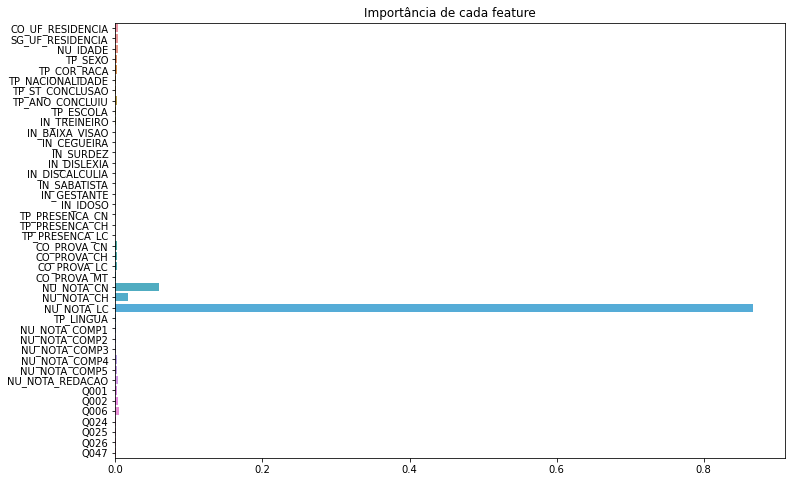

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
importances = pd.Series(data=fi, index=aux)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [0]:
## Observado que quase todas as features não tem peso relevante, para fins de testes utilizando apenas as features com relevância
aux = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']
df_features = df[aux]
df2_features = df2[aux]

In [47]:
rand.fit(df_features, target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
#Predizendo a nota de matemática
result_features = rand.predict(df2_features)

In [49]:
rand.score(df_features, target)

0.9874503652066202

In [0]:
res = rand.predict(df_features)

In [51]:
print('MAE:', metrics.mean_absolute_error(target, res).round(8)  )
print('MSE:', metrics.mean_squared_error(target, res).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(target, res)).round(8))

MAE: 17.13273587
MSE: 643.39638159
RMSE: 25.36525934


In [0]:
answer_features = pd.DataFrame(data= df2['NU_INSCRICAO'])

In [0]:
answer_features['NU_NOTA_MT'] = result_features

In [54]:
answer_features.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,402.308
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,441.816
2,b38a03232f43b11c9d0788abaf060f7366053b6d,589.562
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,555.909


In [0]:
answer_features.to_csv(path + 'answer_features.csv', index= False)

Com a seleção das features mais relevantes, obtive um score de 91%, apesar de ter abaixado o score em comparação a primeira tentativa o número de features é extremamente inferior e demonstrando que as 3 features foram muito eficientes